# Exploratory Data Analysis - Census Data

## 1. Import Data from csv file saved locally

In [1]:
from sqlalchemy import create_engine
import pandas as pd

In [2]:
engine = create_engine("sqlite://///Users/valentinarizzati/Desktop/census.db")

In [3]:
engine.table_names()

['census_data']

## 2. Preliminary Exploratory Data Analysis with SQLAlchemy

In [4]:
census_df = pd.read_sql('SELECT * FROM census_data;', engine)

In [5]:
census_df

,PUMA,AVG_AGE,AVG_PERSONS_HOUSEHOLD,HOUSEHOLD_INCOME
0,"NYC-Bronx Community District 8--Riverdale, Fie...",41.11620757,2.135688286,86788.26881
1,"NYC-Bronx Community District 12--Wakefield, Wi...",38.36332851,2.606469568,68552.93399
2,"NYC-Bronx Community District 10--Co-op City, P...",44.04601604,2.121812206,77269.65678
3,NYC-Bronx Community District 11--Pelham Parkwa...,39.03061404,2.377509614,68719.26172
4,"NYC-Bronx Community District 3 & 6--Belmont, C...",33.63112096,2.336309746,36341.97802
5,"NYC-Bronx Community District 7--Bedford Park, ...",33.98860096,2.609866987,44986.84846
6,NYC-Bronx Community District 5--Morris Heights...,33.81674521,2.536967497,40413.36483
7,"NYC-Bronx Community District 4--Concourse, Hig...",33.15946558,2.473964874,45522.80994
8,"NYC-Bronx Community District 9--Castle Hill, C...",37.7455883,2.388177467,50524.9732
9,NYC-Bronx Community District 1 & 2--Hunts Poin...,35.03546475,2.253264355,42741.66239


In [6]:
census_df_1 = pd.read_sql('SELECT PUMA, MAX(AVG_AGE) AS MAX_AGE FROM census_data;', engine)

In [7]:
census_df_1

,PUMA,MAX_AGE
0,NYC-Brooklyn Community District 13--Brighton B...,44.34197125


NYC-Brooklyn Community District 13 presents the maximum average age across all 55 PUMAs.

In [8]:
census_df_2 = pd.read_sql('SELECT PUMA, MIN(AVG_AGE) AS MIN_AGE FROM census_data;', engine)

In [9]:
census_df_2

,PUMA,MIN_AGE
0,NYC-Brooklyn Community District 12--Borough Pa...,31.39708762


In [10]:
census_df_3 = pd.read_sql('SELECT PUMA, MAX(AVG_PERSONS_HOUSEHOLD) AS MAX_PERSONS_HOUSEHOLD FROM census_data;', engine)

In [11]:
census_df_3

,PUMA,MAX_PERSONS_HOUSEHOLD
0,NYC-Brooklyn Community District 12--Borough Pa...,3.230322581


NYC-Brooklyn Community District 12 presents the maximum AVG_PERSONS_HOUSEHOLD. Since, as part of this project, we are targeting PUMAs presenting a large amount of families, this NYC-Brooklyn Community District 12 should definitely be explored further. <br />
Interestingly enough, this PUMA presents both the minimum age and the maximum amount of persons per household. 

In [12]:
census_df_4 = pd.read_sql('SELECT PUMA, MAX(HOUSEHOLD_INCOME) FROM census_data;', engine)

In [13]:
census_df_4

,PUMA,MAX(HOUSEHOLD_INCOME)
0,"NYC-Queens Community District 11--Bayside, Dou...",99957.40215


A cross check with the csv indicates that 99957.40215 is not the maximum household income. There must be an issue with the HOUSEHOLD_INCOME column. <br />My suspicion is that the content of the column HOUSEHOLD_INCOME is not interpreted as a float, but as a string. 

In [14]:
type(census_df['HOUSEHOLD_INCOME'])

pandas.core.series.Series

In [15]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   PUMA                   55 non-null     object
 1   AVG_AGE                55 non-null     object
 2   AVG_PERSONS_HOUSEHOLD  55 non-null     object
 3   HOUSEHOLD_INCOME       55 non-null     object
dtypes: object(4)
memory usage: 1.8+ KB


In [16]:
test_max = max(census_df['HOUSEHOLD_INCOME'])

In [17]:
test_max

'99957.40215'

The output max of HOUSEHOLD_INCOME is not the actual maximum value. In fact, 99957.40215 is not the maximum value of HOUSEHOLD_INCOME. 

In [18]:
# Sum two values in the HOUSEHOLD_INCOME column as a sanity check
test_sum = census_df.iloc[0,3] + census_df.iloc[1,3]

In [19]:
test_sum

'86788.2688168552.93399'

A second sanity check by summing the first and second value of HOUSEHOLD_INCOME in the dataset indicates that the result is not the sum of the floats, but a string instead.

In [20]:
# Data in the HOUSEHOLD_INCOME column is converted to float
census_df[['HOUSEHOLD_INCOME']] = census_df[['HOUSEHOLD_INCOME']].astype('float')

In [21]:
# Repeat sanity check by summing two values in HOUSEHOLD_INCOME column
test_sum_1 = census_df.iloc[0,3] + census_df.iloc[1,3]

In [22]:
test_sum_1

155341.2028

Now the sum of the two subsequent values in the HOUSEHOLD_INCOME column is indeed the sum of the two floats, and not a string. Data type conversion has been successfully executed.

In [23]:
# Rename column more explicitly
census_df.rename(columns = {'HOUSEHOLD_INCOME': 'AVG_HOUSEHOLD_INCOME'}, inplace = True)

In [24]:
census_df

,PUMA,AVG_AGE,AVG_PERSONS_HOUSEHOLD,AVG_HOUSEHOLD_INCOME
0,"NYC-Bronx Community District 8--Riverdale, Fie...",41.11620757,2.135688286,86788.26881
1,"NYC-Bronx Community District 12--Wakefield, Wi...",38.36332851,2.606469568,68552.93399
2,"NYC-Bronx Community District 10--Co-op City, P...",44.04601604,2.121812206,77269.65678
3,NYC-Bronx Community District 11--Pelham Parkwa...,39.03061404,2.377509614,68719.26172
4,"NYC-Bronx Community District 3 & 6--Belmont, C...",33.63112096,2.336309746,36341.97802
5,"NYC-Bronx Community District 7--Bedford Park, ...",33.98860096,2.609866987,44986.84846
6,NYC-Bronx Community District 5--Morris Heights...,33.81674521,2.536967497,40413.36483
7,"NYC-Bronx Community District 4--Concourse, Hig...",33.15946558,2.473964874,45522.80994
8,"NYC-Bronx Community District 9--Castle Hill, C...",37.7455883,2.388177467,50524.97320
9,NYC-Bronx Community District 1 & 2--Hunts Poin...,35.03546475,2.253264355,42741.66239


## 3. Exploratory Data Analysis in Pandas

### 3.1 Explore Data

In [25]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PUMA                   55 non-null     object 
 1   AVG_AGE                55 non-null     object 
 2   AVG_PERSONS_HOUSEHOLD  55 non-null     object 
 3   AVG_HOUSEHOLD_INCOME   55 non-null     float64
dtypes: float64(1), object(3)
memory usage: 1.8+ KB


AVG_AGE and AVG_PERSONS_HOUSEHOLD must be transformed to float data types.

In [26]:
# Convert AVG_AGE to float
census_df["AVG_AGE"] = pd.to_numeric(census_df["AVG_AGE"])

In [27]:
# Convert AVG_AGE to float
census_df["AVG_PERSONS_HOUSEHOLD"] = pd.to_numeric(census_df["AVG_PERSONS_HOUSEHOLD"])

In [28]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PUMA                   55 non-null     object 
 1   AVG_AGE                55 non-null     float64
 2   AVG_PERSONS_HOUSEHOLD  55 non-null     float64
 3   AVG_HOUSEHOLD_INCOME   55 non-null     float64
dtypes: float64(3), object(1)
memory usage: 1.8+ KB


Conversion has been successfully executed.

In [29]:
census_df.head()

,PUMA,AVG_AGE,AVG_PERSONS_HOUSEHOLD,AVG_HOUSEHOLD_INCOME
0,"NYC-Bronx Community District 8--Riverdale, Fie...",41.116208,2.135688,86788.26881
1,"NYC-Bronx Community District 12--Wakefield, Wi...",38.363329,2.606470,68552.93399
2,"NYC-Bronx Community District 10--Co-op City, P...",44.046016,2.121812,77269.65678
3,NYC-Bronx Community District 11--Pelham Parkwa...,39.030614,2.377510,68719.26172
4,"NYC-Bronx Community District 3 & 6--Belmont, C...",33.631121,2.336310,36341.97802


In [30]:
census_df.describe()

,AVG_AGE,AVG_PERSONS_HOUSEHOLD,AVG_HOUSEHOLD_INCOME
count,55.000000,55.000000,55.000000
mean,38.700085,2.300518,86664.697515
std,3.070584,0.428634,37148.758110
min,31.397088,1.377754,36341.978020
25%,37.018044,2.102303,68636.097855
50%,38.730686,2.354281,77269.656780
75%,40.881504,2.581139,96364.169155
max,44.341971,3.230323,201948.571100


The distribution of AVG_AGE is fairly narrow, as we see from the low values of standard deviation at 3.07. Differently, the distribution of AVG_HOUSEHOLD_INCOME is wider.

### 3.2 Data Cleaning

Since the dataframe is only composed of 55 rows it is possible to just visually examine the data for missing values, duplicates, and inconsistencies.

#### 3.2.1 Check for duplicates

In [31]:
census_df

,PUMA,AVG_AGE,AVG_PERSONS_HOUSEHOLD,AVG_HOUSEHOLD_INCOME
0,"NYC-Bronx Community District 8--Riverdale, Fie...",41.116208,2.135688,86788.26881
1,"NYC-Bronx Community District 12--Wakefield, Wi...",38.363329,2.606470,68552.93399
2,"NYC-Bronx Community District 10--Co-op City, P...",44.046016,2.121812,77269.65678
3,NYC-Bronx Community District 11--Pelham Parkwa...,39.030614,2.377510,68719.26172
4,"NYC-Bronx Community District 3 & 6--Belmont, C...",33.631121,2.336310,36341.97802
5,"NYC-Bronx Community District 7--Bedford Park, ...",33.988601,2.609867,44986.84846
6,NYC-Bronx Community District 5--Morris Heights...,33.816745,2.536967,40413.36483
7,"NYC-Bronx Community District 4--Concourse, Hig...",33.159466,2.473965,45522.80994
8,"NYC-Bronx Community District 9--Castle Hill, C...",37.745588,2.388177,50524.97320
9,NYC-Bronx Community District 1 & 2--Hunts Poin...,35.035465,2.253264,42741.66239


In [32]:
census_df.PUMA.value_counts()

NYC-Brooklyn Community District 4--Bushwick PUMA, New York                                             1
NYC-Manhattan Community District 6--Murray Hill, Gramercy & Stuyvesant Town PUMA; New York             1
NYC-Queens Community District 4--Elmhurst & South Corona PUMA, New York                                1
NYC-Queens Community District 3--Jackson Heights & North Corona PUMA, New York                         1
NYC-Queens Community District 8--Briarwood, Fresh Meadows & Hillcrest PUMA; New York                   1
NYC-Queens Community District 6--Forest Hills & Rego Park PUMA, New York                               1
NYC-Manhattan Community District 4 & 5--Chelsea, Clinton & Midtown Business District PUMA; New York    1
NYC-Brooklyn Community District 12--Borough Park, Kensington & Ocean Parkway PUMA; New York            1
NYC-Brooklyn Community District 10--Bay Ridge & Dyker Heights PUMA, New York                           1
NYC-Bronx Community District 5--Morris Heights, Fordham

There are no duplicate PUMAs.

#### 3.2.2 Check for missing values

In [33]:
census_df.isna().sum()

PUMA                     0
AVG_AGE                  0
AVG_PERSONS_HOUSEHOLD    0
AVG_HOUSEHOLD_INCOME     0
dtype: int64

There are no missing values.

#### 3.2.3 Check for outliers

In [34]:
census_df.describe()

,AVG_AGE,AVG_PERSONS_HOUSEHOLD,AVG_HOUSEHOLD_INCOME
count,55.000000,55.000000,55.000000
mean,38.700085,2.300518,86664.697515
std,3.070584,0.428634,37148.758110
min,31.397088,1.377754,36341.978020
25%,37.018044,2.102303,68636.097855
50%,38.730686,2.354281,77269.656780
75%,40.881504,2.581139,96364.169155
max,44.341971,3.230323,201948.571100


By looking at the summary statistics, it's pretty evident that there are no outliers in the data.

## 4. Data Manipulation

The census_df will be used to isolate the PUMAs that fall in the target for the Spotify KIDS Outdoor Marketing campaign. <br />
The target for this campaign is families with children younger than 18 years old. Therefore, I will use the following targeting parameters:
* AVG_AGE > 30 
* AVG_PERSONS_HOUSEHOLD > 2
* AVG_HOUSEHOLD_INCOME > USD 100k

The column **IN_TARGET** will be added to the dataframe: <br />
* A value of 'YES' will indicate that the PUMA in question is in target for the campaign
* A value of 'NO' will indicate that the PUMA in question is not in target for the campaign

In [35]:
# Define a fuction to identify if a specific PUMA is in target for the campaign
def find_target(age, persons, income):
    if age > 30:
        if persons > 2:
            if income > 90000:
                return 'YES'
            else:
                return 'NO'
        else:
            return 'NO'      
    else:
        return 'NO'

In [36]:
# Add column IN_TARGET to the dataframe
census_df['IN_TARGET'] = census_df.apply(lambda x: find_target(x['AVG_AGE'], x['AVG_PERSONS_HOUSEHOLD'], x['AVG_HOUSEHOLD_INCOME']), axis=1)

In [37]:
census_df.sort_values(by=['IN_TARGET'], ascending=False)

,PUMA,AVG_AGE,AVG_PERSONS_HOUSEHOLD,AVG_HOUSEHOLD_INCOME,IN_TARGET
27,"NYC-Brooklyn Community District 6--Park Slope,...",37.341553,2.240369,190640.73530,YES
45,NYC-Queens Community District 13--Queens Villa...,42.245283,2.864101,103646.07330,YES
31,NYC-Brooklyn Community District 18--Canarsie &...,40.056227,2.581528,90082.10179,YES
23,NYC-Brooklyn Community District 1--Greenpoint ...,35.148875,2.231105,119603.89670,YES
35,NYC-Brooklyn Community District 10--Bay Ridge ...,41.135425,2.354281,90954.32881,YES
21,NYC-Staten Island Community District 2--New Sp...,41.665055,2.629408,109321.87370,YES
20,NYC-Staten Island Community District 3--Totten...,40.199216,2.610094,114466.98850,YES
44,"NYC-Queens Community District 11--Bayside, Dou...",43.431911,2.406867,99957.40215,YES
28,NYC-Brooklyn Community District 8--Crown Heigh...,37.556544,2.082794,91788.76877,YES
53,NYC-Queens Community District 10--Howard Beach...,41.656728,2.778062,98921.65961,YES


In [46]:
import matplotlib.pyplot as plt
mask_yes_target = census_df[(census_df.IN_TARGET == 'YES')]
mask_yes_target
plt.savefig(r"/Users/valentinarizzati/Desktop/Images/census_puma_target.png");

<Figure size 432x288 with 0 Axes>

In [50]:
# Filter the PUMAs in target in a more visually appealing way
import dataframe_image as dfi
mask_yes_target_styled = mask_yes_target.style.background_gradient()
mask_yes_target_styled

,PUMA,AVG_AGE,AVG_PERSONS_HOUSEHOLD,AVG_HOUSEHOLD_INCOME,IN_TARGET
20,"NYC-Staten Island Community District 3--Tottenville, Great Kills & Annadale PUMA; New York",40.199216,2.610094,114466.988500,YES
21,"NYC-Staten Island Community District 2--New Springville & South Beach PUMA, New York",41.665055,2.629408,109321.873700,YES
23,"NYC-Brooklyn Community District 1--Greenpoint & Williamsburg PUMA, New York",35.148875,2.231105,119603.896700,YES
27,"NYC-Brooklyn Community District 6--Park Slope, Carroll Gardens & Red Hook PUMA; New York",37.341553,2.240369,190640.735300,YES
28,"NYC-Brooklyn Community District 8--Crown Heights North & Prospect Heights PUMA, New York",37.556544,2.082794,91788.768770,YES
31,"NYC-Brooklyn Community District 18--Canarsie & Flatlands PUMA, New York",40.056227,2.581528,90082.101790,YES
35,"NYC-Brooklyn Community District 10--Bay Ridge & Dyker Heights PUMA, New York",41.135425,2.354281,90954.328810,YES
44,"NYC-Queens Community District 11--Bayside, Douglaston & Little Neck PUMA; New York",43.431911,2.406867,99957.402150,YES
45,"NYC-Queens Community District 13--Queens Village, Cambria Heights & Rosedale PUMA; New York",42.245283,2.864101,103646.073300,YES
53,"NYC-Queens Community District 10--Howard Beach & Ozone Park PUMA, New York",41.656728,2.778062,98921.659610,YES


In [52]:
# Export to png for presentation
mask_yes_target_styled.export_png('/Users/valentinarizzati/Desktop/Images/census_puma_target.png')

In [55]:
# Create top 10 rankings of PUMAs by AVG_AGE, AVG_PERSONS_HOUSEHOLD, and AVG_HOUSEHOLD_INCOME to be used in the creation of the bar charts
pumas_top10_age = mask_yes_target.sort_values(['AVG_AGE'], ascending=False)
pumas_top10_size = mask_yes_target.sort_values(['AVG_PERSONS_HOUSEHOLD'], ascending=False)
pumas_top10_income = mask_yes_target.sort_values(['AVG_HOUSEHOLD_INCOME'], ascending=False)

In [56]:
pumas_top10_age

,PUMA,AVG_AGE,AVG_PERSONS_HOUSEHOLD,AVG_HOUSEHOLD_INCOME,IN_TARGET
44,"NYC-Queens Community District 11--Bayside, Dou...",43.431911,2.406867,99957.40215,YES
45,NYC-Queens Community District 13--Queens Villa...,42.245283,2.864101,103646.07330,YES
21,NYC-Staten Island Community District 2--New Sp...,41.665055,2.629408,109321.87370,YES
53,NYC-Queens Community District 10--Howard Beach...,41.656728,2.778062,98921.65961,YES
35,NYC-Brooklyn Community District 10--Bay Ridge ...,41.135425,2.354281,90954.32881,YES
20,NYC-Staten Island Community District 3--Totten...,40.199216,2.610094,114466.98850,YES
31,NYC-Brooklyn Community District 18--Canarsie &...,40.056227,2.581528,90082.10179,YES
28,NYC-Brooklyn Community District 8--Crown Heigh...,37.556544,2.082794,91788.76877,YES
27,"NYC-Brooklyn Community District 6--Park Slope,...",37.341553,2.240369,190640.73530,YES
23,NYC-Brooklyn Community District 1--Greenpoint ...,35.148875,2.231105,119603.89670,YES


In [57]:
pumas_top10_size

,PUMA,AVG_AGE,AVG_PERSONS_HOUSEHOLD,AVG_HOUSEHOLD_INCOME,IN_TARGET
45,NYC-Queens Community District 13--Queens Villa...,42.245283,2.864101,103646.07330,YES
53,NYC-Queens Community District 10--Howard Beach...,41.656728,2.778062,98921.65961,YES
21,NYC-Staten Island Community District 2--New Sp...,41.665055,2.629408,109321.87370,YES
20,NYC-Staten Island Community District 3--Totten...,40.199216,2.610094,114466.98850,YES
31,NYC-Brooklyn Community District 18--Canarsie &...,40.056227,2.581528,90082.10179,YES
44,"NYC-Queens Community District 11--Bayside, Dou...",43.431911,2.406867,99957.40215,YES
35,NYC-Brooklyn Community District 10--Bay Ridge ...,41.135425,2.354281,90954.32881,YES
27,"NYC-Brooklyn Community District 6--Park Slope,...",37.341553,2.240369,190640.73530,YES
23,NYC-Brooklyn Community District 1--Greenpoint ...,35.148875,2.231105,119603.89670,YES
28,NYC-Brooklyn Community District 8--Crown Heigh...,37.556544,2.082794,91788.76877,YES


In [58]:
pumas_top10_income

,PUMA,AVG_AGE,AVG_PERSONS_HOUSEHOLD,AVG_HOUSEHOLD_INCOME,IN_TARGET
27,"NYC-Brooklyn Community District 6--Park Slope,...",37.341553,2.240369,190640.73530,YES
23,NYC-Brooklyn Community District 1--Greenpoint ...,35.148875,2.231105,119603.89670,YES
20,NYC-Staten Island Community District 3--Totten...,40.199216,2.610094,114466.98850,YES
21,NYC-Staten Island Community District 2--New Sp...,41.665055,2.629408,109321.87370,YES
45,NYC-Queens Community District 13--Queens Villa...,42.245283,2.864101,103646.07330,YES
44,"NYC-Queens Community District 11--Bayside, Dou...",43.431911,2.406867,99957.40215,YES
53,NYC-Queens Community District 10--Howard Beach...,41.656728,2.778062,98921.65961,YES
28,NYC-Brooklyn Community District 8--Crown Heigh...,37.556544,2.082794,91788.76877,YES
35,NYC-Brooklyn Community District 10--Bay Ridge ...,41.135425,2.354281,90954.32881,YES
31,NYC-Brooklyn Community District 18--Canarsie &...,40.056227,2.581528,90082.10179,YES


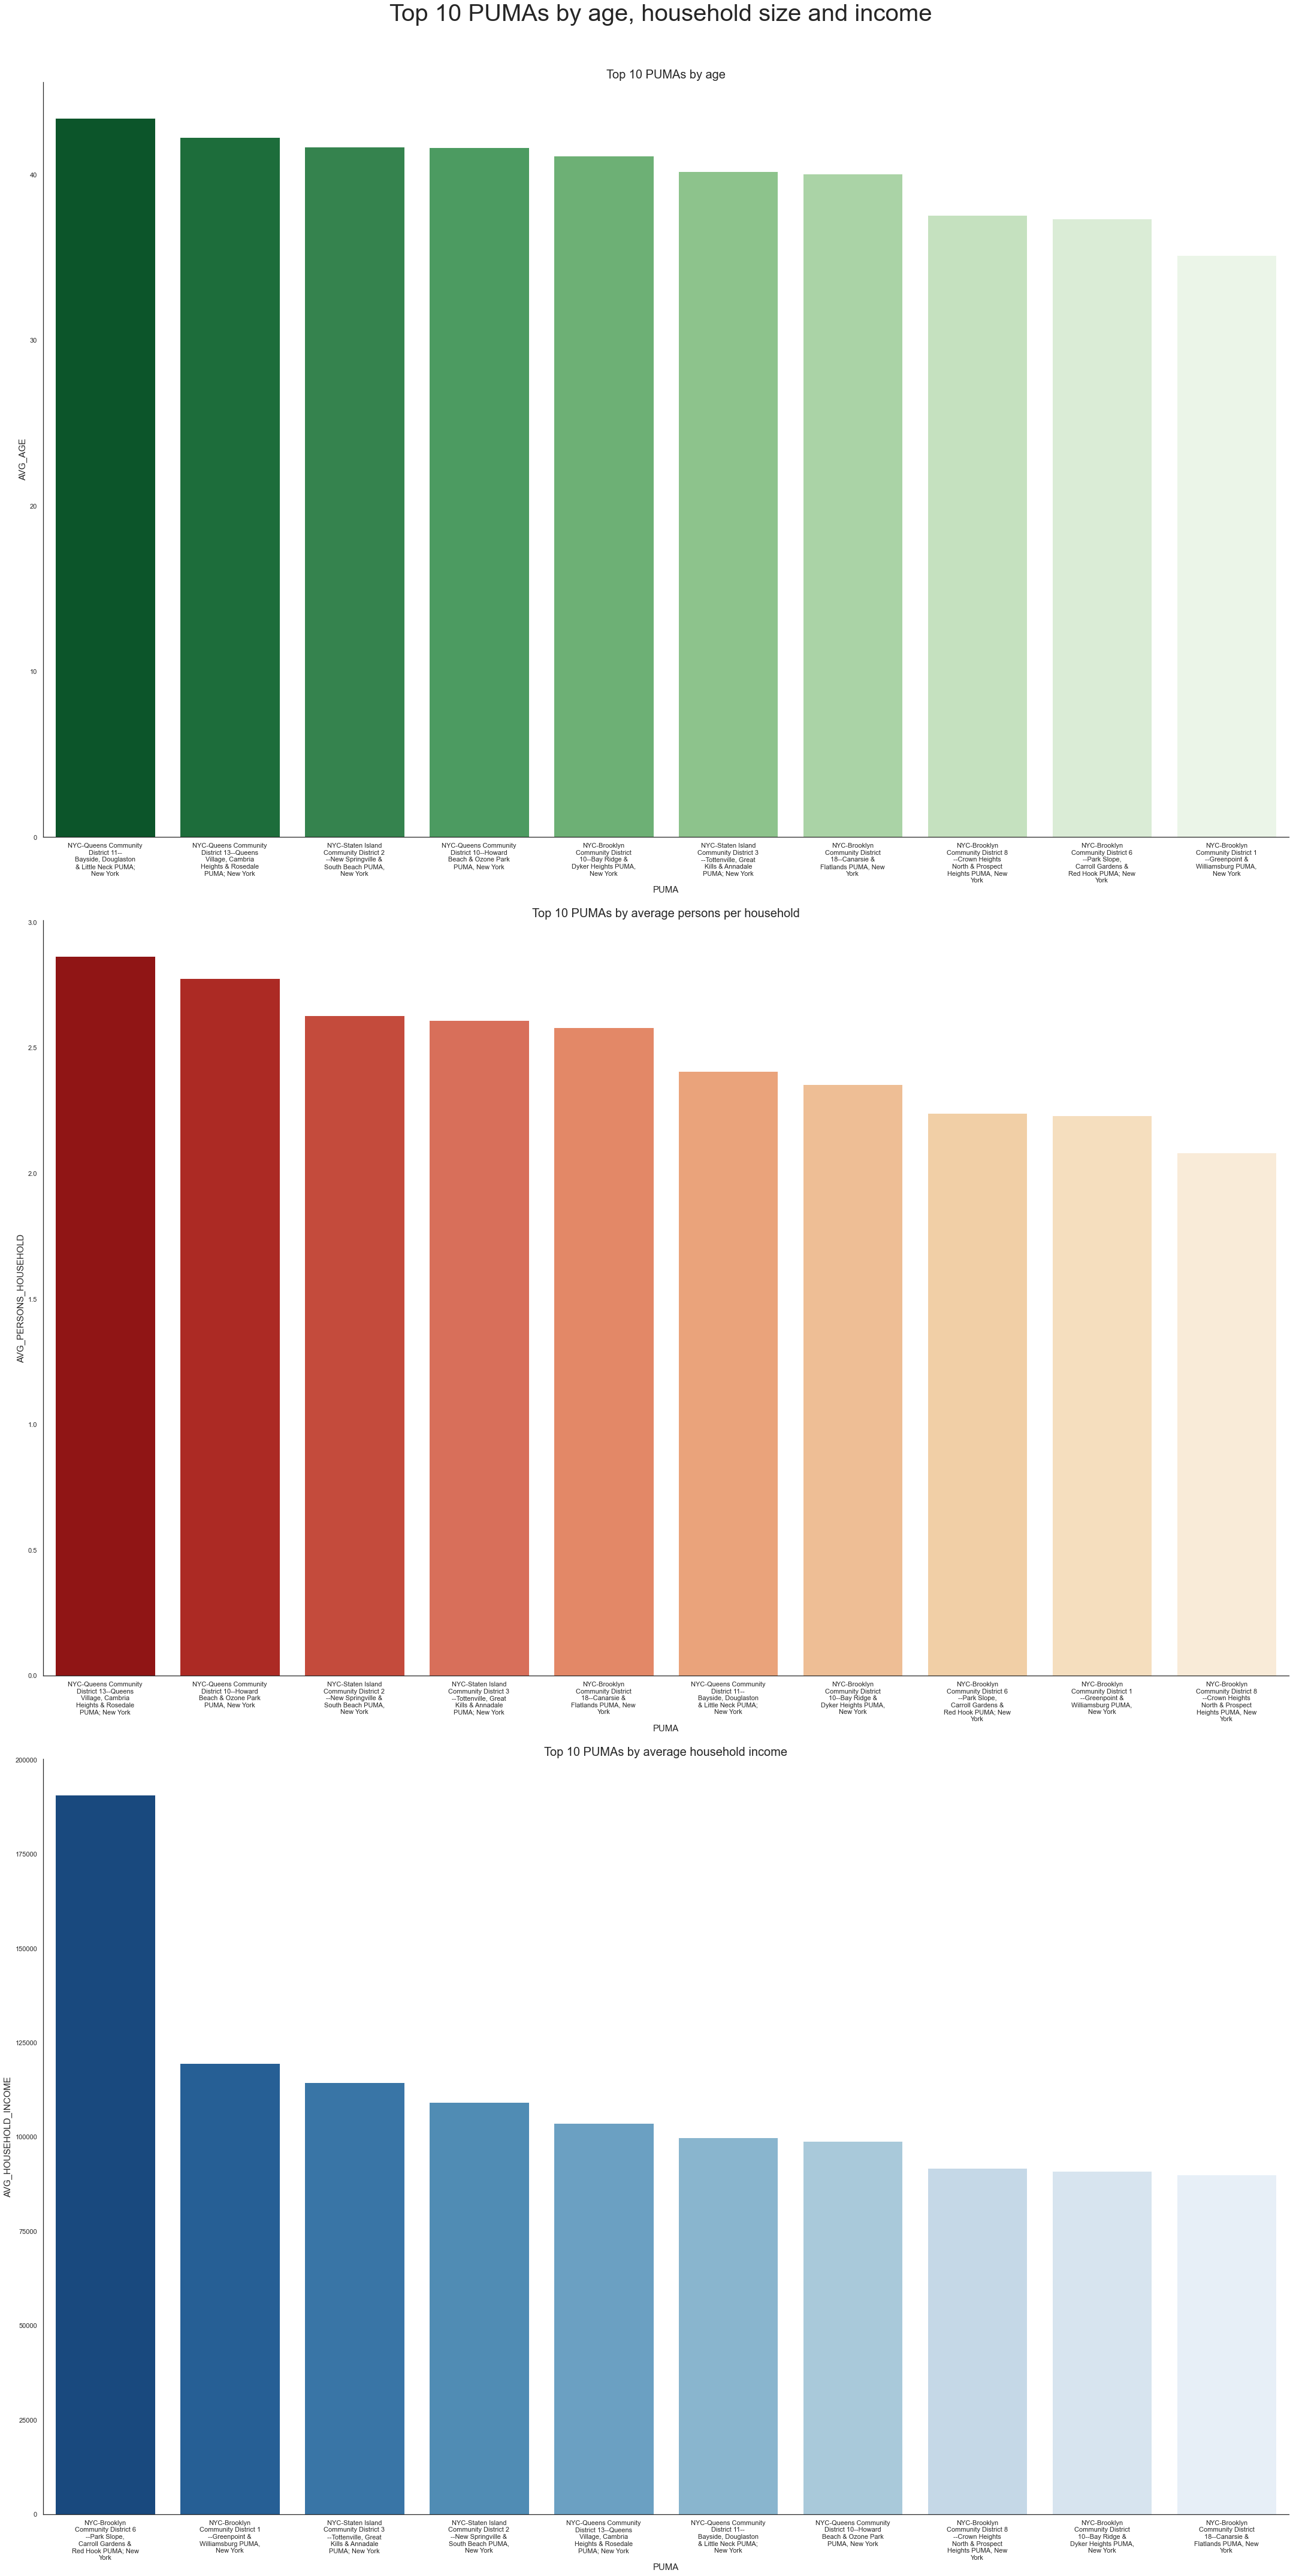

In [149]:
import textwrap
max_width = 20

fig, axes = plt.subplots(3,1, figsize=(30,60))
fig.suptitle('Top 10 PUMAs by age, household size and income', fontsize = 40)

fig.set_figwidth(30)
fig.set_figheight(60)

fig.tight_layout(pad=2, h_pad=10.0)
fig.subplots_adjust(top=0.95)

plt.rcParams["axes.labelsize"] = 15

# Top 10 PUMAs by average age
x_age = pumas_top10_age['PUMA']
y_age = pumas_top10_age['AVG_AGE']
sns.set_style("white")
plot_age = sns.barplot(ax=axes[0], x = x_age, y = y_age, palette = sns.color_palette('Greens_r', 10))
axes[0].set_title('Top 10 PUMAs by age', fontsize = 20)
axes[0].set(xlabel="PUMA", ylabel = "AVG_AGE")
plot_age.set_xticklabels(textwrap.fill(x.get_text(), max_width) for x in plot_age.get_xticklabels())
sns.despine()

#sns.set_palette("pastel")

# Top 10 PUMAs by average persons per household
x_size = pumas_top10_size['PUMA']
y_size = pumas_top10_size['AVG_PERSONS_HOUSEHOLD']
sns.set_style("white")
plot_size = sns.barplot(ax=axes[1], x = x_size, y = y_size, palette = sns.color_palette('OrRd_r',10))
axes[1].set_title('Top 10 PUMAs by average persons per household', fontsize = 20)
axes[1].set(xlabel="PUMA", ylabel = "AVG_PERSONS_HOUSEHOLD")
plot_size.set_xticklabels(textwrap.fill(x.get_text(), max_width) for x in plot_size.get_xticklabels())
sns.despine()

# Top 10 PUMAs by average age
x_income = pumas_top10_income['PUMA']
y_income = pumas_top10_income['AVG_HOUSEHOLD_INCOME']
sns.set_style("white")
plot_income = sns.barplot(ax=axes[2], x = x_income, y = y_income, palette = sns.color_palette('Blues_r',10))
axes[2].set_title('Top 10 PUMAs by average household income', fontsize = 20)
axes[2].set(xlabel="PUMA", ylabel = "AVG_HOUSEHOLD_INCOME")
plot_income.set_xticklabels(textwrap.fill(x.get_text(), max_width) for x in plot_income.get_xticklabels())
sns.despine()

plot_age.figure.savefig('/Users/valentinarizzati/Desktop/Images/census_puma_top10_bar_age.png')
plot_size.figure.savefig('/Users/valentinarizzati/Desktop/Images/census_puma_top10_bar_size.png')
plot_income.figure.savefig('/Users/valentinarizzati/Desktop/Images/census_puma_top10_bar_income.png');

In [39]:
# Sanity Check on PUMAs not in target
mask_no_target = census_df[(census_df.IN_TARGET == 'NO')]

In [47]:
mask_no_target

,PUMA,AVG_AGE,AVG_PERSONS_HOUSEHOLD,AVG_HOUSEHOLD_INCOME,IN_TARGET
0,"NYC-Bronx Community District 8--Riverdale, Fie...",41.116208,2.135688,86788.26881,NO
1,"NYC-Bronx Community District 12--Wakefield, Wi...",38.363329,2.606470,68552.93399,NO
2,"NYC-Bronx Community District 10--Co-op City, P...",44.046016,2.121812,77269.65678,NO
3,NYC-Bronx Community District 11--Pelham Parkwa...,39.030614,2.377510,68719.26172,NO
4,"NYC-Bronx Community District 3 & 6--Belmont, C...",33.631121,2.336310,36341.97802,NO
5,"NYC-Bronx Community District 7--Bedford Park, ...",33.988601,2.609867,44986.84846,NO
6,NYC-Bronx Community District 5--Morris Heights...,33.816745,2.536967,40413.36483,NO
7,"NYC-Bronx Community District 4--Concourse, Hig...",33.159466,2.473965,45522.80994,NO
8,"NYC-Bronx Community District 9--Castle Hill, C...",37.745588,2.388177,50524.97320,NO
9,NYC-Bronx Community District 1 & 2--Hunts Poin...,35.035465,2.253264,42741.66239,NO


In [41]:
census_df.IN_TARGET.value_counts()

NO     45
YES    10
Name: IN_TARGET, dtype: int64

In [42]:
pumas_target = census_df[(census_df.IN_TARGET == 'YES')]
pumas_target

,PUMA,AVG_AGE,AVG_PERSONS_HOUSEHOLD,AVG_HOUSEHOLD_INCOME,IN_TARGET
20,NYC-Staten Island Community District 3--Totten...,40.199216,2.610094,114466.98850,YES
21,NYC-Staten Island Community District 2--New Sp...,41.665055,2.629408,109321.87370,YES
23,NYC-Brooklyn Community District 1--Greenpoint ...,35.148875,2.231105,119603.89670,YES
27,"NYC-Brooklyn Community District 6--Park Slope,...",37.341553,2.240369,190640.73530,YES
28,NYC-Brooklyn Community District 8--Crown Heigh...,37.556544,2.082794,91788.76877,YES
31,NYC-Brooklyn Community District 18--Canarsie &...,40.056227,2.581528,90082.10179,YES
35,NYC-Brooklyn Community District 10--Bay Ridge ...,41.135425,2.354281,90954.32881,YES
44,"NYC-Queens Community District 11--Bayside, Dou...",43.431911,2.406867,99957.40215,YES
45,NYC-Queens Community District 13--Queens Villa...,42.245283,2.864101,103646.07330,YES
53,NYC-Queens Community District 10--Howard Beach...,41.656728,2.778062,98921.65961,YES


There are 10 PUMAs that could fall in the target for our campaign. <br />
At this point this list must be analyzed in line with qualitative considerations and institutional knowledge about the PUMAs (e.g. the two PUMAs in Staten Island will likely not fall in the final target because Staten Island is fairly remote and qualitatively known to be characterized by low foot traffic). <br />
In addition, this PUMA target list will be have to be interpreted in light of the ranking of MTA stations by foot traffic to ensure that the outdoor campaign is run in both a target PUMA, but also in an area with high foot traffic.